In [14]:
#import packages

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings

# import data to the jupyter lab

df = pd.read_csv("D:/Pizza Sales live project/pizza_sales.csv")

#check metadata of raw data

df.head()  #identify first 5 rows of the table by default
df.tail() #identify last 5 rows of the table by default
print("The Metadata of the dataset: ", df.shape) # gives the number of rows and coloums in the dataset
print("The Metadata of the dataset: ", df.shape[0]) #no of rows in the dataset
print("The Metadata of the dataset: ", df.shape[1]) #no of colomns in the dataset
df.columns #column names in the dataset
df.info()  #gives the info of the datas, if its null, datatype etc

#datatypes in raw data

df.dtypes  #gives datatypes of each coloumn
df.describe() #gives all the statistics of the data.. count, mean, std, ...

#KPI's of the dataset according to the problem statement

total_revenue = df['total_price'].sum()
total_pizzas_sold = df['quantity']. sum()
total_orders = df['order_id'].nunique()
average_order_value = total_revenue / total_orders
average_pizzas_per_order = total_pizzas_sold / total_orders

print(f"Total Revene: ${total_revenue: ,.2f}")
print(f"Total Pizzas Sold: {total_pizzas_sold: ,}")
print(f"Total Orders: {total_orders: ,}")
print(f"Average Order Value: ${average_order_value: ,.2f}")
print(f"Average Pizzas per Order: {average_pizzas_per_order: ,.2f}")

#charts

#ingredient analysis

ingredient= (
    df["pizza_ingredients"]
    .str.split(",")   #split that pizza ingredients coloums with comma seperator
    .explode() #turning each element created as seperate rows
    .str.strip() # remove all white spaces from start and end of a string
    .value_counts() #count all the particular ingredients
    .reset_index()  #give indexes to the seperated coloums
    .rename(columns={'index':'count', 'pizza_ingredients': 'ingredients'})
)
print(ingredient.head(15))






The Metadata of the dataset:  (48620, 12)
The Metadata of the dataset:  48620
The Metadata of the dataset:  12
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pizza_id           48620 non-null  int64  
 1   order_id           48620 non-null  int64  
 2   pizza_name_id      48620 non-null  object 
 3   quantity           48620 non-null  int64  
 4   order_date         48620 non-null  object 
 5   order_time         48620 non-null  object 
 6   unit_price         48620 non-null  float64
 7   total_price        48620 non-null  float64
 8   pizza_size         48620 non-null  object 
 9   pizza_category     48620 non-null  object 
 10  pizza_ingredients  48620 non-null  object 
 11  pizza_name         48620 non-null  object 
dtypes: float64(2), int64(3), object(7)
memory usage: 4.5+ MB
Total Revene: $ 817,860.05
Total Pizzas Sold: 

#daily trend - total orders

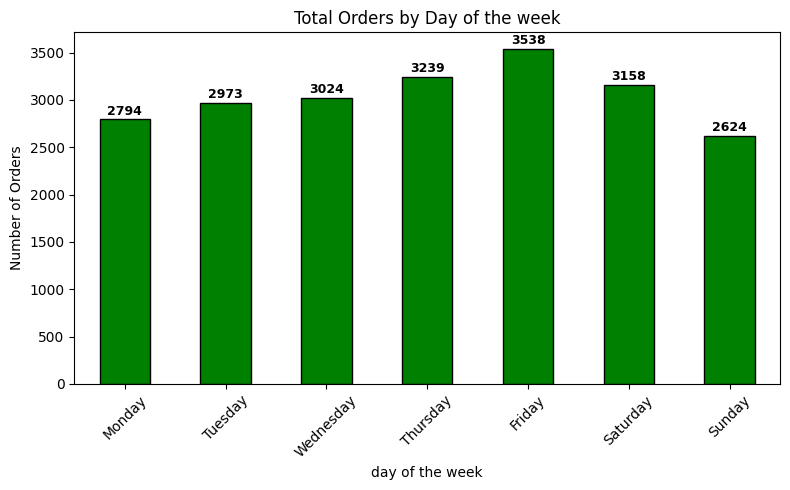

In [18]:
# taking the order_date column from dataset and converting it into a real date format that Python understands.
#dayfirst=True means the date is in DD/MM/YYYY style
df['order_date'] = pd.to_datetime(df['order_date'], dayfirst=True)

#From each date, pull out the day of the week (like Monday, Tuesday...)
#This creates a new column called day_name
df['day_name'] = df['order_date'].dt.day_name()

#a list showing the correct order of days.
weekday_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

#Treat day names as a category, not random text
#Use the order we defined above
df["day_name"] = pd.Categorical(df['day_name'], categories=weekday_order, ordered=True)

orders_by_day = df.groupby('day_name',observed=False)['order_id'].nunique()
ax = orders_by_day.plot(kind='bar', figsize=(8,5), color='green', edgecolor='black')

plt.title("Total Orders by Day of the week")
plt.xlabel("day of the week")
plt.ylabel("Number of Orders")
plt.xticks(rotation=45)

for i, value in enumerate(orders_by_day):
    plt.text(i, value + 20, str(value), ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()

#daily trend - total Revenue

<!-- Daily Trend for Revenue -->

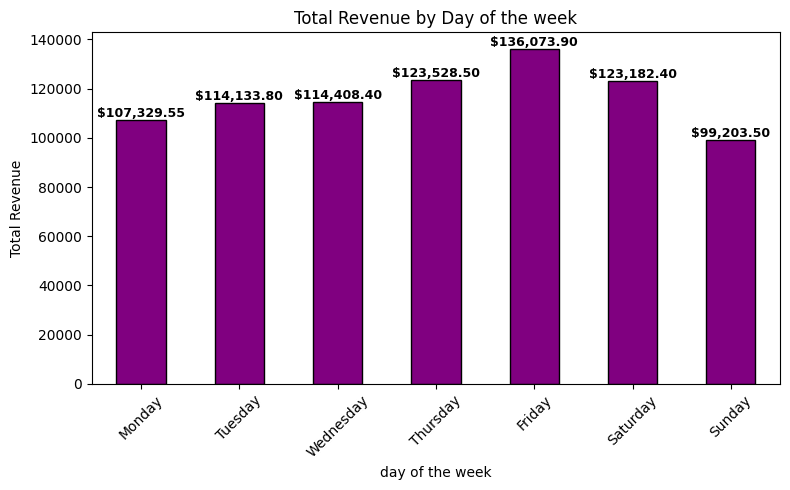

In [19]:
# taking the order_date column from dataset and converting it into a real date format that Python understands.
#dayfirst=True means the date is in DD/MM/YYYY style
df['order_date'] = pd.to_datetime(df['order_date'], dayfirst=True)

#From each date, pull out the day of the week (like Monday, Tuesday...)
#This creates a new column called day_name
df['day_name'] = df['order_date'].dt.day_name()

#a list showing the correct order of days.
weekday_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

#Treat day names as a category, not random text
#Use the order we defined above
df["day_name"] = pd.Categorical(df['day_name'], categories=weekday_order, ordered=True)

orders_by_day = df.groupby('day_name',observed=False)['total_price'].sum()
ax = orders_by_day.plot(kind='bar', figsize=(8,5), color='purple', edgecolor='black')

plt.title("Total Revenue by Day of the week")
plt.xlabel("day of the week")
plt.ylabel("Total Revenue")
plt.xticks(rotation=45)

for i, value in enumerate(orders_by_day):
    text_label = f"${value:,.2f}"
    plt.text(i, value + 20, text_label, ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()

#daily trend - total Quantity

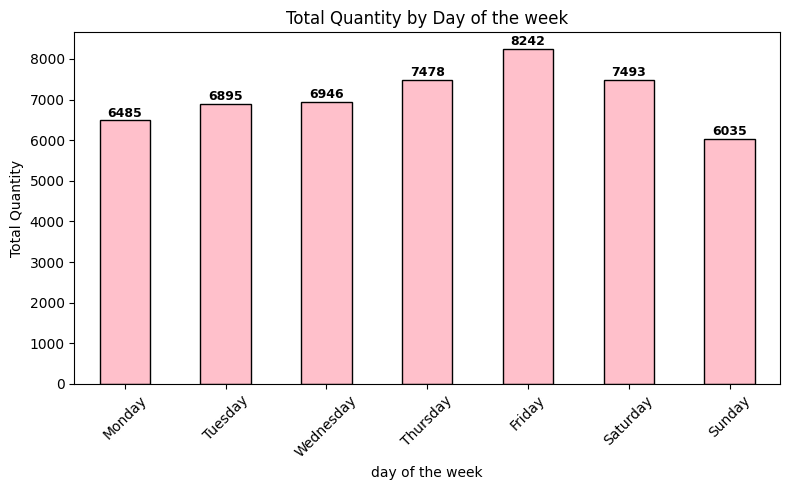

In [20]:
# taking the order_date column from dataset and converting it into a real date format that Python understands.
#dayfirst=True means the date is in DD/MM/YYYY style
df['order_date'] = pd.to_datetime(df['order_date'], dayfirst=True)

#From each date, pull out the day of the week (like Monday, Tuesday...)
#This creates a new column called day_name
df['day_name'] = df['order_date'].dt.day_name()

#a list showing the correct order of days.
weekday_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

#Treat day names as a category, not random text
#Use the order we defined above
df["day_name"] = pd.Categorical(df['day_name'], categories=weekday_order, ordered=True)

orders_by_day = df.groupby('day_name',observed=False)['quantity'].sum()
ax = orders_by_day.plot(kind='bar', figsize=(8,5), color='pink', edgecolor='black')

plt.title("Total Quantity by Day of the week")
plt.xlabel("day of the week")
plt.ylabel("Total Quantity")
plt.xticks(rotation=45)

#placement of value above bar
for i, value in enumerate(orders_by_day):
    plt.text(i, value + 20, str(value), ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()

#hourly trend for total orders -- 
shop is running from 9am-11pm

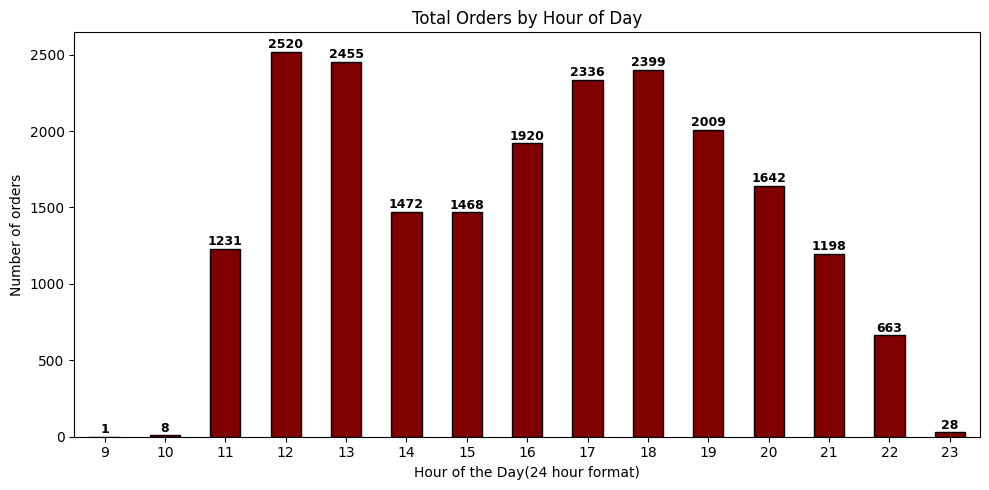

In [21]:
df['order_time'] = pd.to_datetime(df['order_time'], format='%H:%M:%S')

df['order_hour'] = df['order_time'].dt.hour

orders_by_hour = df.groupby('order_hour', observed=False)['order_id'].nunique()
#observed=false means if there is no order in a particular hour, it will still show on graph with 0 value

ax = orders_by_hour.plot(kind='bar', figsize=(10,5), color='maroon', edgecolor='black')

plt.title("Total Orders by Hour of Day")
plt.xlabel("Hour of the Day(24 hour format)")
plt.ylabel("Number of orders")
plt.xticks(rotation=0)

for i, value in enumerate(orders_by_hour):
    plt.text(i, value+5, str(value), ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()

Hourly Trend - Total revenue

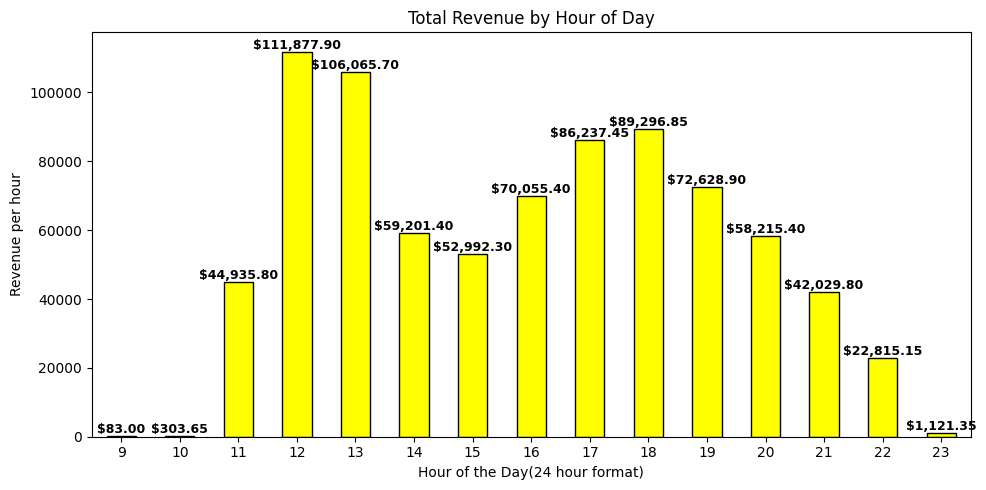

In [24]:
df['order_time'] = pd.to_datetime(df['order_time'], format='%H:%M:%S')

df['order_hour'] = df['order_time'].dt.hour

orders_by_hour = df.groupby('order_hour', observed=False)['total_price'].sum()
#observed=false means if there is no order in a particular hour, it will still show on graph with 0 value

ax = orders_by_hour.plot(kind='bar', figsize=(10,5), color='yellow', edgecolor='black')

plt.title("Total Revenue by Hour of Day")
plt.xlabel("Hour of the Day(24 hour format)")
plt.ylabel("Revenue per hour")
plt.xticks(rotation=0)


for i, value in enumerate(orders_by_hour):
    text_label = f"${value:,.2f}"
    plt.text(i, value+5, text_label, ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()

Hourly Trend -- Total Quantity

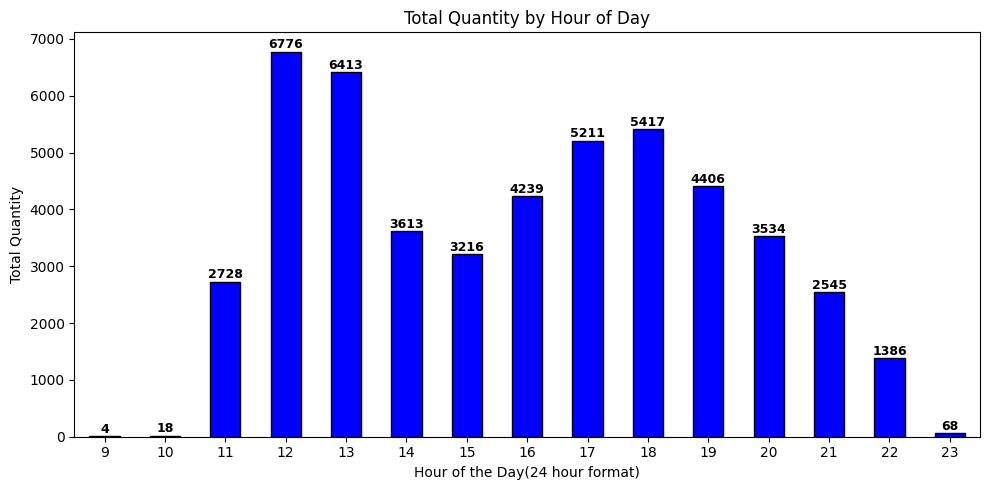

In [25]:
df['order_time'] = pd.to_datetime(df['order_time'], format='%H:%M:%S')

df['order_hour'] = df['order_time'].dt.hour

orders_by_hour = df.groupby('order_hour', observed=False)['quantity'].sum()

ax = orders_by_hour.plot(kind='bar', figsize=(10,5), color='blue', edgecolor='black')

plt.title("Total Quantity by Hour of Day")
plt.xlabel("Hour of the Day(24 hour format)")
plt.ylabel("Total Quantity")
plt.xticks(rotation=0)

for i, value in enumerate(orders_by_hour):
    plt.text(i, value+5, str(value), ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()

Monthly Trend -- Total Orders

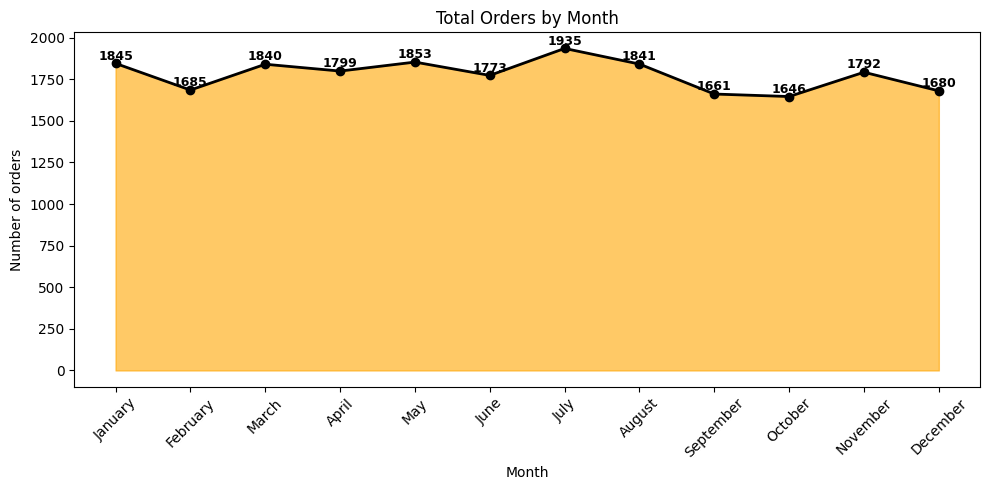

In [26]:
#The order_date column is converted from text to a proper date format.
df['order_date'] = pd.to_datetime(df['order_date'], dayfirst=True)

#From each date, the code extracts the month and creates a new column month_name.
df['month_name'] = df['order_date'].dt.month_name()

#A manual list of months for proper sorting.
month_order=["January", "February", "March", "April", "May", "June", "July",
             "August", "September", "October", "November", "December"]

#Makes sure when we sort months, they follow calendar order.
# Without this step, sorting would be alphabetical.
df['month_name'] = pd.Categorical(df['month_name'], categories=month_order, ordered=True)

#Groups records by month name
# Counts number of unique order_id values in each month
orders_by_month = df.groupby('month_name', observed=False)['order_id'].nunique()

#Creates a new chart canvas.
plt.figure(figsize=(10,5))
#Fills the area under the line with a soft orange shade.
# alpha=0.6 means 60% transparency so the filling looks smooth, not too dark.
plt.fill_between(orders_by_month.index, orders_by_month.values, color="orange", alpha=0.6)
# Draws the actual line through monthly order counts.
# marker='o' adds a dot on each month → shows exact data points.
plt.plot(orders_by_month.index, orders_by_month.values, color="black", linewidth=2, marker='o')

plt.title("Total Orders by Month")
plt.xlabel("Month")
plt.ylabel("Number of orders")
plt.xticks(rotation=45)
plt.tight_layout()

for i, value in enumerate(orders_by_month):
    plt.text(i, value+5, str(value), ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.show()

Monthly Trend - Total Revenue

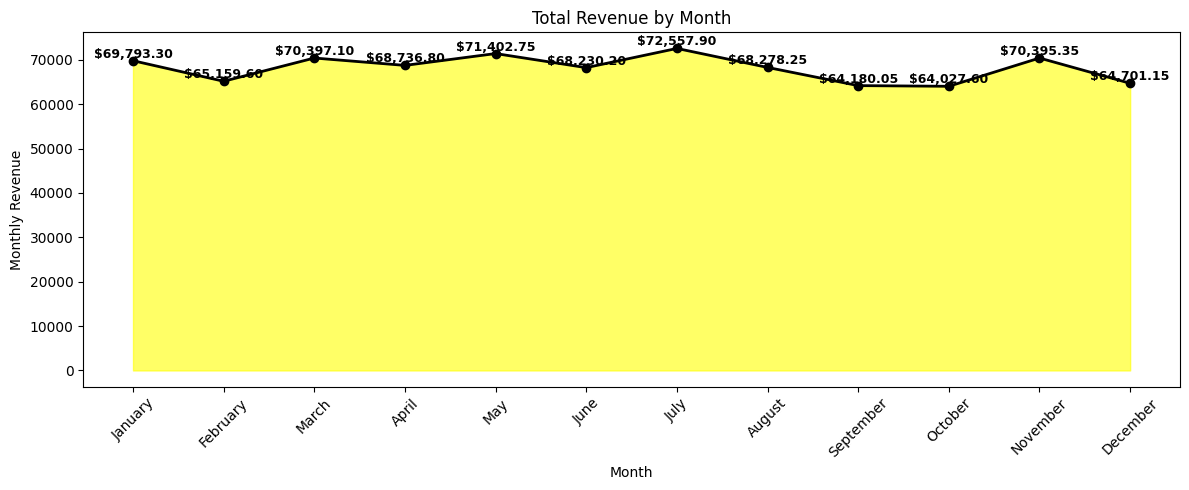

In [27]:
df['order_date'] = pd.to_datetime(df['order_date'], dayfirst=True)

df['month_name'] = df['order_date'].dt.month_name()

month_order=["January", "February", "March", "April", "May", "June", "July",
             "August", "September", "October", "November", "December"]

df['month_name'] = pd.Categorical(df['month_name'], categories=month_order, ordered=True)

orders_by_month = df.groupby('month_name', observed=False)['total_price'].sum()

plt.figure(figsize=(12,5))
plt.fill_between(orders_by_month.index, orders_by_month.values, color="yellow", alpha=0.6)
plt.plot(orders_by_month.index, orders_by_month.values, color="black", linewidth=2, marker='o')

plt.title("Total Revenue by Month")
plt.xlabel("Month")
plt.ylabel("Monthly Revenue")
plt.xticks(rotation=45)
plt.tight_layout()

for i, value in enumerate(orders_by_month):
    text_label = f"${value:,.2f}"
    plt.text(i, value+5, text_label, ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.show()

Monthly Trend - Total Quantity

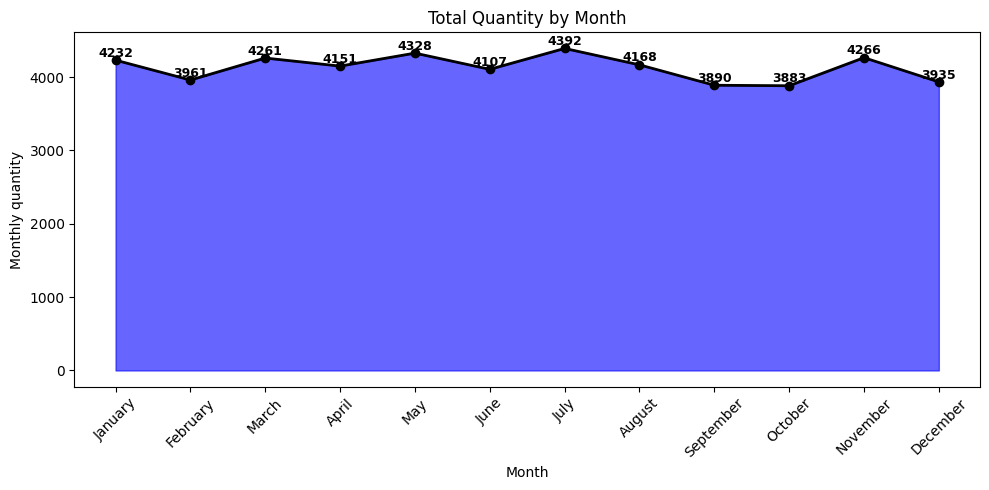

In [28]:
df['order_date'] = pd.to_datetime(df['order_date'], dayfirst=True)

df['month_name'] = df['order_date'].dt.month_name()

month_order=["January", "February", "March", "April", "May", "June", "July",
             "August", "September", "October", "November", "December"]

df['month_name'] = pd.Categorical(df['month_name'], categories=month_order, ordered=True)

orders_by_month = df.groupby('month_name', observed=False)['quantity'].sum()

plt.figure(figsize=(10,5))
plt.fill_between(orders_by_month.index, orders_by_month.values, color="blue", alpha=0.6)
plt.plot(orders_by_month.index, orders_by_month.values, color="black", linewidth=2, marker='o')

plt.title("Total Quantity by Month")
plt.xlabel("Month")
plt.ylabel("Monthly quantity")
plt.xticks(rotation=45)
plt.tight_layout()

for i, value in enumerate(orders_by_month):
    plt.text(i, value+5, str(value), ha='center', va='bottom', fontsize=9, fontweight='bold')


Percentage of sales by Category

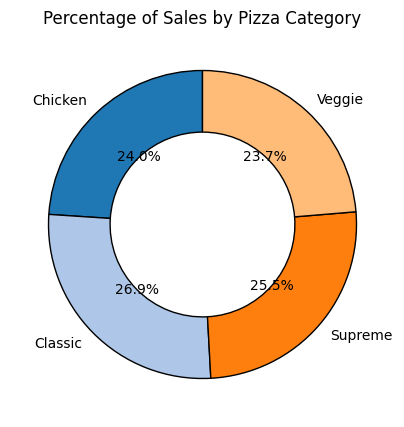

In [29]:
# df.groupby('pizza_category') → groups all orders by pizza category (like Veg, classic etc.)
# ['total_price'].sum() → sums up all total_price values for each category
category_sales = df.groupby('pizza_category')['total_price'].sum()

# Calculate percentage contribution
# category_sales.sum() → total sales across all categories
# category_sales / total → fraction of each category
# *100 → converts fraction to percentage
category_percentage = category_sales / category_sales.sum() * 100

# Sets the canvas size for the pie chart (10×10 inches → square chart)
plt.figure(figsize=(5,5))
# Uses Matplotlib’s tab20 colormap → a palette of 20 distinct colors
# Each pizza category gets a unique, visually distinct color
colors = plt.get_cmap('tab20').colors


plt.pie(category_percentage,  # values to plot
        labels=category_percentage.index,  # slice labels (pizza categories)
        autopct='%1.1f%%', # show percentage on each slice
        startangle=90, # rotates chart so first slice starts at 12 o’clock
        colors=colors, # apply custom colors
        wedgeprops={'edgecolor':'black', 'width':0.4}) # slice border color & inner radius for donut style
plt.title("Percentage of Sales by Pizza Category")
plt.show()

Percentage of sales by Pizza Size and Category ---- heat map



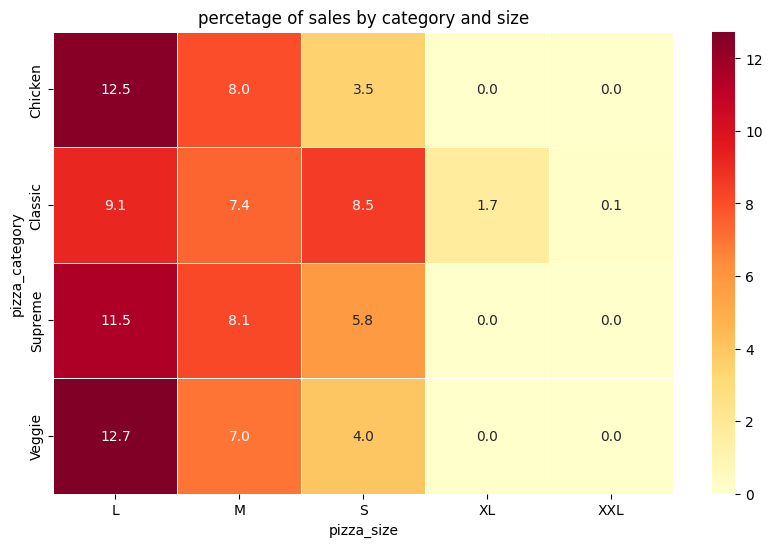

In [30]:
sales_pivot = df.pivot_table(    #reshapes your DataFrame to make a table of categories vs sizes
    index='pizza_category',      #each row represents a pizza category (Veg, Non-Veg, etc.)
    columns='pizza_size',       #each column represents pizza size (Small, Medium, Large)
    values='total_price',        #we’re interested in the sales amount
    aggfunc='sum',               #sums the sales for each combination of category & size
    fill_value=0                 #if a category-size combo has no sales, fill it with 0 instead of NaN
)


# sales_pivot.sum().sum() → total sales across all categories & sizes
# Divide each cell by total sales → get fraction
# * 100 → convert fraction to percentage
sales_percentage = sales_pivot / sales_pivot.sum().sum() *100 

plt.figure(figsize=(10,6))
sns.heatmap(sales_percentage, 
            annot=True, # show percentage in each cell
            fmt='.1f',   # 1 decimal place
            cmap='YlOrRd',  # color palette
            linewidths=0.5   # lines between cells
            )
plt.title('percetage of sales by category and size')
plt.ylabel=('pizza_category')
plt.xlabel=('pizza_size')
plt.show()

Total Pizzas sold by pizza category  --horizonthal bar chart

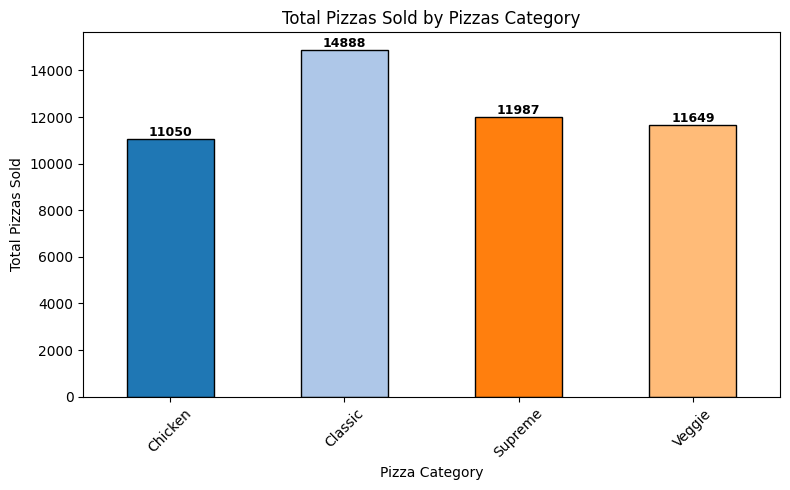

In [33]:
#For each category, it sums up the 'quantity' column 
# — meaning it totals how many pizzas were sold in each category.
#A new pandas Series named pizzas_by_category, where the index is each pizza category, and 
# the values are the total quantities sold.
pizzas_by_category = df.groupby('pizza_category')['quantity'].sum()

#Gets a predefined color palette called 'tab20' from Matplotlib’s color maps.
#.colors gives a list of RGBA tuples (colors).
colors = list(plt.get_cmap('tab20').colors)

#Slices the list of colors so it only includes as many colors as there are pizza categories.
colors = colors[:len(pizzas_by_category)]

#The bar chart is stored in the variable ax, which represents the Matplotlib Axes object.
ax = pizzas_by_category.plot(kind='bar', figsize=(8,5), color=colors, edgecolor='black')

plt.title("Total Pizzas Sold by Pizzas Category")
plt.xlabel("Pizza Category")
plt.ylabel("Total Pizzas Sold")
plt.xticks(rotation=45)

#enumerate(pizzas_by_category) loops through each bar (i = index, value = height).
#enumerate() is a built-in Python function that makes it easier to loop through sequences 
# (like lists, tuples, or pandas Series) 
# while keeping track of both the index and the value at the same time.
for i, value in enumerate(pizzas_by_category):
    plt.text(i, value+5, str(value), ha="center", va="bottom", fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()

In [16]:
import matplotlib.pyplot as plt
print(type(plt.xlabel))


<class 'str'>


In [17]:
import importlib
importlib.reload(plt)


<module 'matplotlib.pyplot' from 'd:\\Pizza Sales live project\\Pizza Python\\venv\\Lib\\site-packages\\matplotlib\\pyplot.py'>

In [32]:
import importlib
import matplotlib.pyplot as plt

# Reload the pyplot module completely
importlib.reload(plt)

# Test again
print("Type after reload:", type(plt.xlabel))


Type after reload: <class 'function'>


Top 5  best selling pizzas - Total Orders 

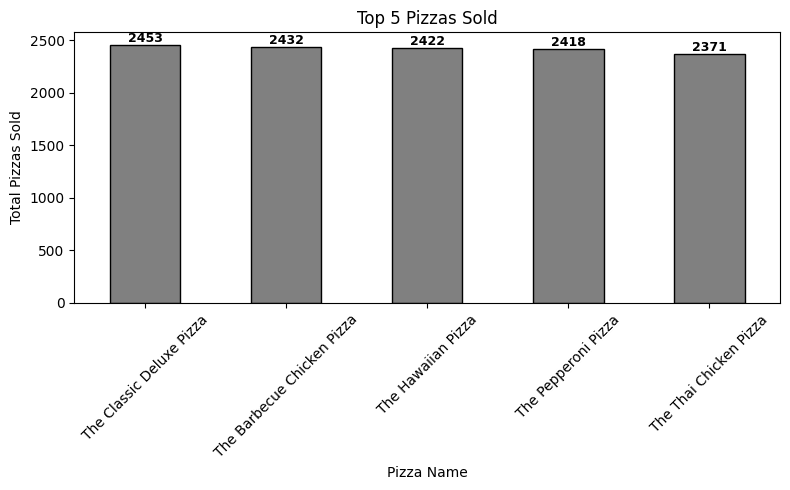

In [ ]:
#For each pizza name, it sums up the 'quantity' column (how many units of that pizza were sold in total).
#A new pandas Series named pizzas_by_name, where:
#The index is each pizza’s name.
#The value is the total number sold
pizzas_by_name = df.groupby('pizza_name')['quantity'].sum()


# sort_values(ascending=False) → sorts the pizzas by total sold, from highest to lowest.
# .head(5) → keeps only the top 5 pizzas.
top5 = pizzas_by_name.sort_values(ascending=False).head(5)

# Plots the top5 Series as a bar chart.
ax=top5.plot(kind='bar', figsize=(8,5), color='grey', edgecolor='black')

plt.title("Top 5 Pizzas Sold")
plt.xlabel("Pizza Name")
plt.ylabel("Total Pizzas Sold")
plt.xticks(rotation=45)

for i, value in enumerate(top5):
    plt.text(i, value+2, str(value), ha= 'center', va='bottom', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()


Top 5 pizzas sold -- total Orders

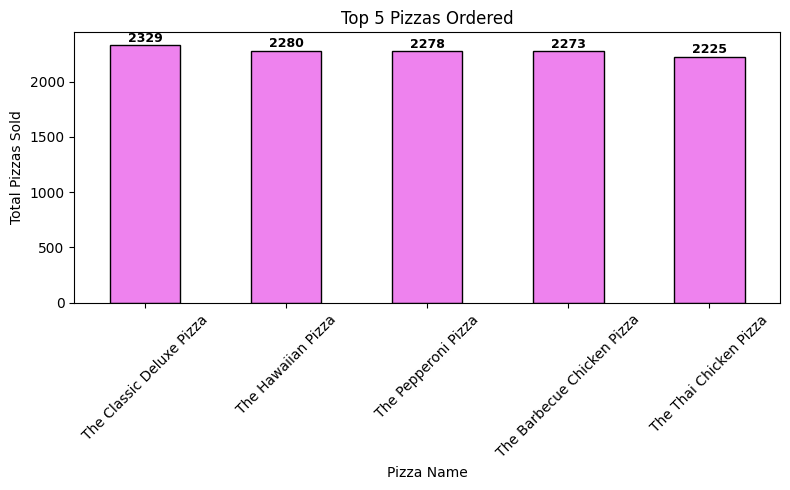

In [40]:
pizzas_by_name = df.groupby('pizza_name')['order_id'].nunique()

top5 = pizzas_by_name.sort_values(ascending=False).head(5)

ax=top5.plot(kind='bar', figsize=(8,5), color='violet', edgecolor='black')

plt.title("Top 5 Pizzas Ordered")
plt.xlabel("Pizza Name")
plt.ylabel("Total Pizzas Sold")
plt.xticks(rotation=45)

for i, value in enumerate(top5):
    plt.text(i, value+2, str(value), ha= 'center', va='bottom', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()


Top 5 pizzas - Total sales

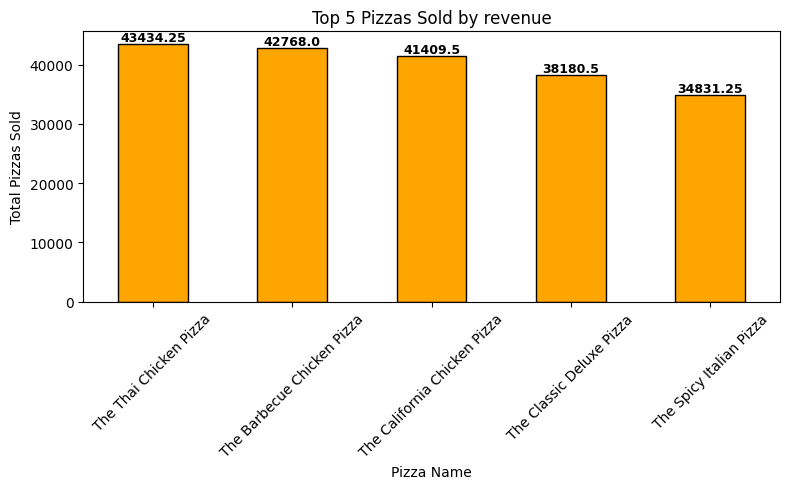

In [42]:
pizzas_by_name = df.groupby('pizza_name')['total_price'].sum()


# sort_values(ascending=False) → sorts the pizzas by total sold, from highest to lowest.
# .head(5) → keeps only the top 5 pizzas.
top5 = pizzas_by_name.sort_values(ascending=False).head(5)

# Plots the top5 Series as a bar chart.
ax=top5.plot(kind='bar', figsize=(8,5), color='orange', edgecolor='black')

plt.title("Top 5 Pizzas Sold by revenue")
plt.xlabel("Pizza Name")
plt.ylabel("Total Pizzas Sold")
plt.xticks(rotation=45)

for i, value in enumerate(top5):
    plt.text(i, value+2, str(value), ha= 'center', va='bottom', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()


Bottom 5 pizzas - total quantity

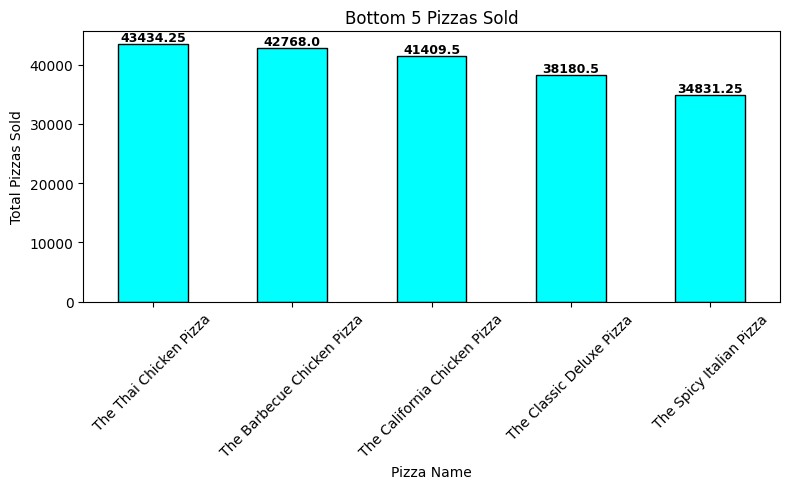

In [47]:
pizzas_by_name = df.groupby('pizza_name')['quantity'].sum()

bottom5 = pizzas_by_name.sort_values(ascending=True).head(5)

ax=top5.plot(kind='bar', figsize=(8,5), color='cyan', edgecolor='black')

plt.title("Bottom 5 Pizzas Sold")
plt.xlabel("Pizza Name")
plt.ylabel("Total Pizzas Sold")
plt.xticks(rotation=45)

for i, value in enumerate(top5):
    plt.text(i, value+2, str(value), ha= 'center', va='bottom', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()

Bottom 5 pizzas solf -- Total Orders

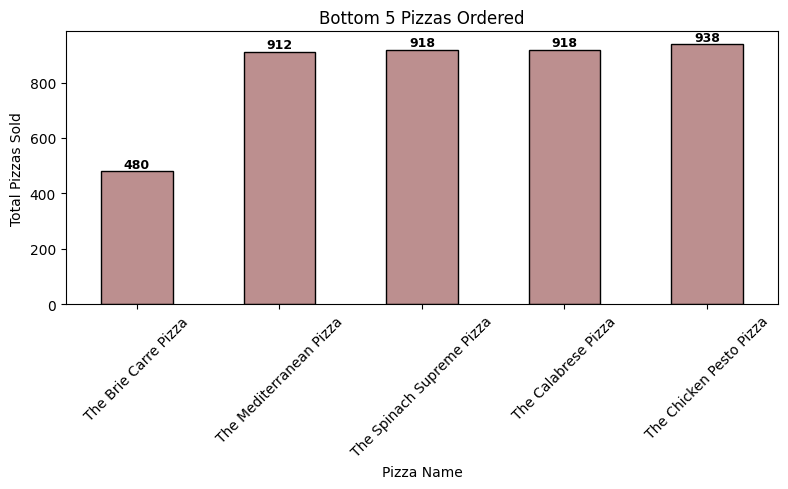

In [49]:
pizzas_by_name = df.groupby('pizza_name')['order_id'].nunique()

top5 = pizzas_by_name.sort_values(ascending=True).head(5)

ax=top5.plot(kind='bar', figsize=(8,5), color='rosybrown', edgecolor='black')

plt.title("Bottom 5 Pizzas Ordered")
plt.xlabel("Pizza Name")
plt.ylabel("Total Pizzas Sold")
plt.xticks(rotation=45)

for i, value in enumerate(top5):
    plt.text(i, value+2, str(value), ha= 'center', va='bottom', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()


Bottom 5 Pizzas sold -- Total Revenue

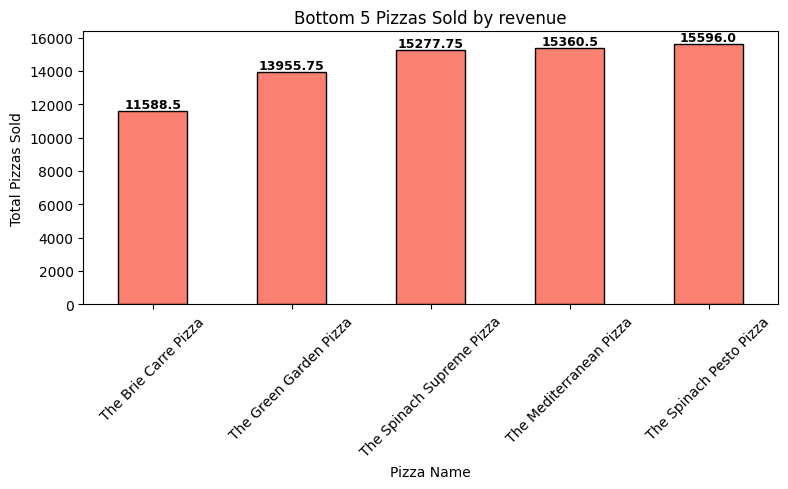

In [52]:
pizzas_by_name = df.groupby('pizza_name')['total_price'].sum()


# sort_values(ascending=False) → sorts the pizzas by total sold, from highest to lowest.
# .head(5) → keeps only the top 5 pizzas.
top5 = pizzas_by_name.sort_values(ascending=True).head(5)

# Plots the top5 Series as a bar chart.
ax=top5.plot(kind='bar', figsize=(8,5), color='salmon', edgecolor='black')

plt.title("Bottom 5 Pizzas Sold by revenue")
plt.xlabel("Pizza Name")
plt.ylabel("Total Pizzas Sold")
plt.xticks(rotation=45)

for i, value in enumerate(top5):
    plt.text(i, value+2, str(value), ha= 'center', va='bottom', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()

